In [109]:
import pandas as pd
from functools import reduce

# `train.csv`

In [13]:
df_train = pd.read_csv('kk_box/train.csv')

In [14]:
df_train

,msno,is_churn
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1
...,...,...
992926,tUM0yxAj50Vc35vQZ++xMlomdyeLJUW9lEcoPnt3H+g=,0
992927,KQS8etmfGgvE/7Y9gK+E9wdLnRTI0lyyPXaXL3I8E4c=,0
992928,8/jDLgNREuWI9hcKVYp8723nmavn01T+AuMWkK3uM7g=,0
992929,iNV99F1Rml7EMndOeLI0Y/iek6aCj/Qp1Z4dZvR+sak=,0


In [89]:
df_train.shape

(992931, 2)

In [7]:
df['msno'].nunique()

992931

# `transactions.csv`

In [75]:
df_transactions = pd.read_csv('kk_box/transactions.csv')

In [84]:
df_transactions.shape

(21547746, 9)

In [85]:
df_transactions['msno'].nunique()

2363626

In [80]:
df_transactions['transaction_date'] = pd.to_datetime(df_transactions['transaction_date'], format='%Y%m%d')

In [82]:
df_transactions_recent = df_transactions.sort_values('transaction_date').drop_duplicates('msno', keep='last')

In [83]:
df_transactions_recent.shape

(2363626, 9)

In [86]:
df_transactions_recent.drop(['transaction_date', 'membership_expire_date', 'is_cancel'], axis=1, inplace=True)

In [91]:
df_transactions_recent

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew
15737981,Dfw2/41SRq2K3rapP0wBp5JQgp9VV13tsRtfgiwk470=,38,30,149,149,0
9938169,GWbRdBcVudgCF0pW7tCLTMz/Fxe7921514SrlGtvepM=,41,30,149,0,1
14182213,C7Zfu90Wb3FLxtCoP3y3fXZLBX8FbJ8xj/V2Zih3G28=,41,30,149,0,1
16167750,CA1r9ztfjJE6qkKOjsJOzmgsjbu29veRP3rFW++fo5M=,37,31,149,149,1
18983809,beKbl9EGuDRbjBuONp58fOcHfs98pCt/GlYh91CzV5E=,41,30,149,0,1
...,...,...,...,...,...,...
15306114,iWBrJKPBKn2fayVWq5cpnyKqwbdv9LdN4iCI5W5IAds=,41,30,99,99,1
15306115,cwGpKgqCr9z0m13j1jlEzWZq5SMLmn17nm0UNyKEbqQ=,41,30,99,99,1
15306116,11UwYeBrdZAsn1W+Dax92F/OBpHV3ypaGf0B8xgNebw=,41,30,99,99,1
15306107,9LoKAGbDKgBM3n0wVq84yoIXlktaVWXA20XyY9xLaz0=,33,30,149,149,1


# `user_log_aggregated.csv`

In [18]:
df_user_logs = pd.read_csv('kk_box/user_log_aggregated.csv')

In [19]:
df_user_logs.shape

(5234111, 11)

In [20]:
df_user_logs.head()

,msno,date_min,date_max,date_count,num_25_sum,num_50_sum,num_75_sum,num_985_sum,num_100_sum,num_unq_sum,total_secs_sum
0,+++4vcS9aMH7KWdfh5git6nA5fC5jjisd5H/NcM++WM=,20150427,20150427,1,1,1,0,0,0,2,9.741100e+01
1,+++EI4HgyhgcJHIPXk/VRP7bt17+2joG39T6oEfJ+tc=,20160420,20160420,1,2,0,0,0,0,1,5.686800e+01
2,+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,20160909,20160915,3,60,12,14,7,171,179,4.999677e+04
3,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,20150101,20170227,10,817,249,227,195,59354,53604,1.466484e+07
4,+++TipL0Kt3JvgNE9ahuJ8o+drJAnQINtxD4c5GePXI=,20151230,20151230,1,3,3,2,1,14,22,3.661527e+03


In [92]:
df_user_logs.drop(['date_min', 'date_max', 'date_count'], axis=1, inplace=True)

In [96]:
df_user_logs.columns = df_user_logs.columns.str.replace('_sum', '')

In [97]:
df_user_logs.head()

,msno,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,+++4vcS9aMH7KWdfh5git6nA5fC5jjisd5H/NcM++WM=,1,1,0,0,0,2,9.741100e+01
1,+++EI4HgyhgcJHIPXk/VRP7bt17+2joG39T6oEfJ+tc=,2,0,0,0,0,1,5.686800e+01
2,+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,60,12,14,7,171,179,4.999677e+04
3,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,817,249,227,195,59354,53604,1.466484e+07
4,+++TipL0Kt3JvgNE9ahuJ8o+drJAnQINtxD4c5GePXI=,3,3,2,1,14,22,3.661527e+03


In [21]:
df_user_logs['msno'].nunique()

5234111

In [22]:
df_user_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5234111 entries, 0 to 5234110
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   msno            object 
 1   date_min        int64  
 2   date_max        int64  
 3   date_count      int64  
 4   num_25_sum      int64  
 5   num_50_sum      int64  
 6   num_75_sum      int64  
 7   num_985_sum     int64  
 8   num_100_sum     int64  
 9   num_unq_sum     int64  
 10  total_secs_sum  float64
dtypes: float64(1), int64(9), object(1)
memory usage: 439.3+ MB


# `members_v3.csv`

In [98]:
df_members = pd.read_csv('kk_box/members_v3.csv')

In [99]:
df_members.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


In [103]:
df_members.drop(['city', 'registration_init_time'], axis=1, inplace=True)

In [104]:
df_members.head()

,msno,bd,gender,registered_via
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,0,NaN,11
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,0,NaN,7
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,0,NaN,11
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,0,NaN,11
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,32,female,9


In [100]:
df_members.shape

(6769473, 6)

In [101]:
df_members['msno'].nunique()

6769473

In [49]:
df_members['bd'].value_counts()

 0      4540215
 22      112200
 21      110574
 20      110452
 27      102769
         ...   
 919          1
 920          1
 923          1
 925          1
-5            1
Name: bd, Length: 386, dtype: int64

In [65]:
# age_valid_mask = (df_members['bd'] > 0) & (df_members['bd'] < 500)

In [66]:
# df_members_with_age = df_members[age_valid_mask]

In [102]:
# df_members_with_age.shape

In [53]:
# df_members_500k = df_members[age_valid_mask].sample(500_000)

In [54]:
# df_members_500k

# Analysis

## Intersection

In [43]:
def get_set(df):
    return  set(df["msno"].tolist())

def find_intersection(df_list):
    intersection_set = get_set(df_list[0])
    for df in df_list[1:]:
        new_set = get_set(df)
        intersection_set = intersection_set.intersection(new_set)
    return list(intersection_set)

In [36]:
def get_intersection_length(df1, df2):
    x = set(df1["msno"].tolist())
    y = set(df2["msno"].tolist())
    
    return len(x.intersection(y))

In [37]:
get_intersection_length(df_members_500k, df_members)

500000

In [68]:
get_intersection_length(df_members_500k, df_train)

86871

In [69]:
get_intersection_length(df_members_500k, df_transactions)

213378

In [70]:
get_intersection_length(df_members_500k, df_user_logs)

373091

In [73]:
common_users = find_intersection([df_members, df_train, df_transactions_recent, df_user_logs])

In [74]:
len(common_users)

869900

In [106]:
def merge_dataframes(data_frames):
    df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['msno'],
                                                how='inner'), data_frames)
    return df_merged

In [111]:
df_list = [df_members, df_train, df_transactions_recent, df_user_logs]

df_merged = merge_dataframes(df_list)

In [112]:
df_merged.head()

,msno,bd,gender,registered_via,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,0,NaN,7,0,41,30,129,129,1,11232,1473,1005,974,25595,28101,7037172.689
1,yLkV2gbZ4GLFwqTOXLVHz0VGrMYcgBGgKZ3kj9RiYu8=,30,male,9,0,39,30,149,149,1,63,14,10,33,140,220,47839.952
2,WH5Jq4mgtfUFXh2yz+HrcTXKS4Oess4k4W3qKolAeb0=,34,male,9,1,32,180,536,536,0,125,71,45,36,1545,1020,410099.424
3,I0yFvqMoNkM8ZNHb617e1RBzIS/YRKemHO7Wj13EtA0=,63,male,9,0,40,30,149,149,1,1096,359,233,282,4734,5447,1355507.929
4,OoDwiKZM+ZGr9P3fRivavgOtglTEaNfWJO4KaJcTTts=,0,NaN,7,0,41,30,149,149,1,827,250,196,275,3295,3506,973960.553


In [113]:
df_merged.shape

(869900, 17)

In [114]:
df_merged['msno'].nunique()

869900

In [7]:
import missingno as msno

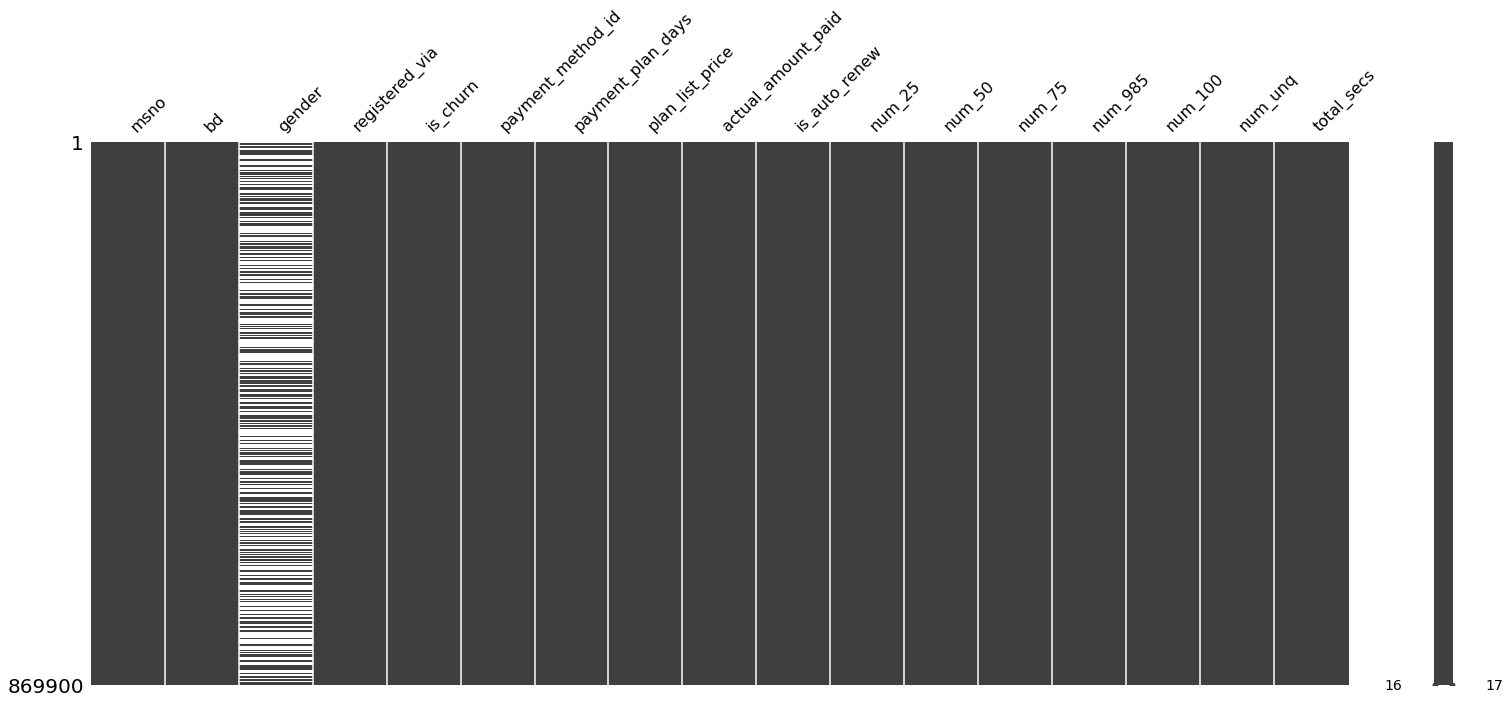

In [116]:
msno.matrix(df_merged)

In [118]:
df_merged.isna().sum()

msno                       0
bd                         0
gender                480022
registered_via             0
is_churn                   0
payment_method_id          0
payment_plan_days          0
plan_list_price            0
actual_amount_paid         0
is_auto_renew              0
num_25                     0
num_50                     0
num_75                     0
num_985                    0
num_100                    0
num_unq                    0
total_secs                 0
dtype: int64

In [119]:
df_merged['gender'].isna().value_counts()

True     480022
False    389878
Name: gender, dtype: int64

In [125]:
age_valid_mask = (df_merged['bd'] > 0) & (df_merged['bd'] < 500)

df_merged_with_age = pd.concat([df_merged[age_valid_mask], df_merged[~age_valid_mask]], axis=0).head(500_000)

df_merged_with_age.shape

(500000, 17)

In [127]:
df_merged_with_age

,msno,bd,gender,registered_via,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
1,yLkV2gbZ4GLFwqTOXLVHz0VGrMYcgBGgKZ3kj9RiYu8=,30,male,9,0,39,30,149,149,1,63,14,10,33,140,220,47839.952
2,WH5Jq4mgtfUFXh2yz+HrcTXKS4Oess4k4W3qKolAeb0=,34,male,9,1,32,180,536,536,0,125,71,45,36,1545,1020,410099.424
3,I0yFvqMoNkM8ZNHb617e1RBzIS/YRKemHO7Wj13EtA0=,63,male,9,0,40,30,149,149,1,1096,359,233,282,4734,5447,1355507.929
5,4De1jAxNRABoyRBDZ82U0yEmzYkqeOugRGVNIf92Xb8=,28,female,9,0,36,30,180,180,1,69,19,10,14,321,275,84676.339
6,Z6WIOK9vXy+e2XDBiioNAxuZ0ScXSU/Ebq4tUwqVSrE=,38,female,9,0,40,30,149,149,1,701,526,244,216,1096,2558,410513.232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225073,rqi+w7JVQV1fqmo5y8z6FfSKOLc+NRyFIHcEonqwQG0=,0,NaN,7,0,41,30,149,149,1,544,70,44,38,1175,1319,319806.914
225074,LSHHqjquHtmfgiNOs5nyu+7LQsy29CylgjUmoQrBXh8=,0,female,9,0,40,30,149,149,1,838,239,92,100,1725,2209,500696.771
225076,m+DlDfXfc57sPTmlGoTWmSs0txANdlt57pgaz2SLL/w=,0,NaN,7,0,41,30,99,99,1,418,81,75,124,2614,1740,756817.019
225077,N4szCcTlAXxicMGF0kDIvO1qxKa6ftl9eJyabEBvE0s=,0,NaN,7,0,41,30,99,99,1,33,11,1,3,78,102,23308.854


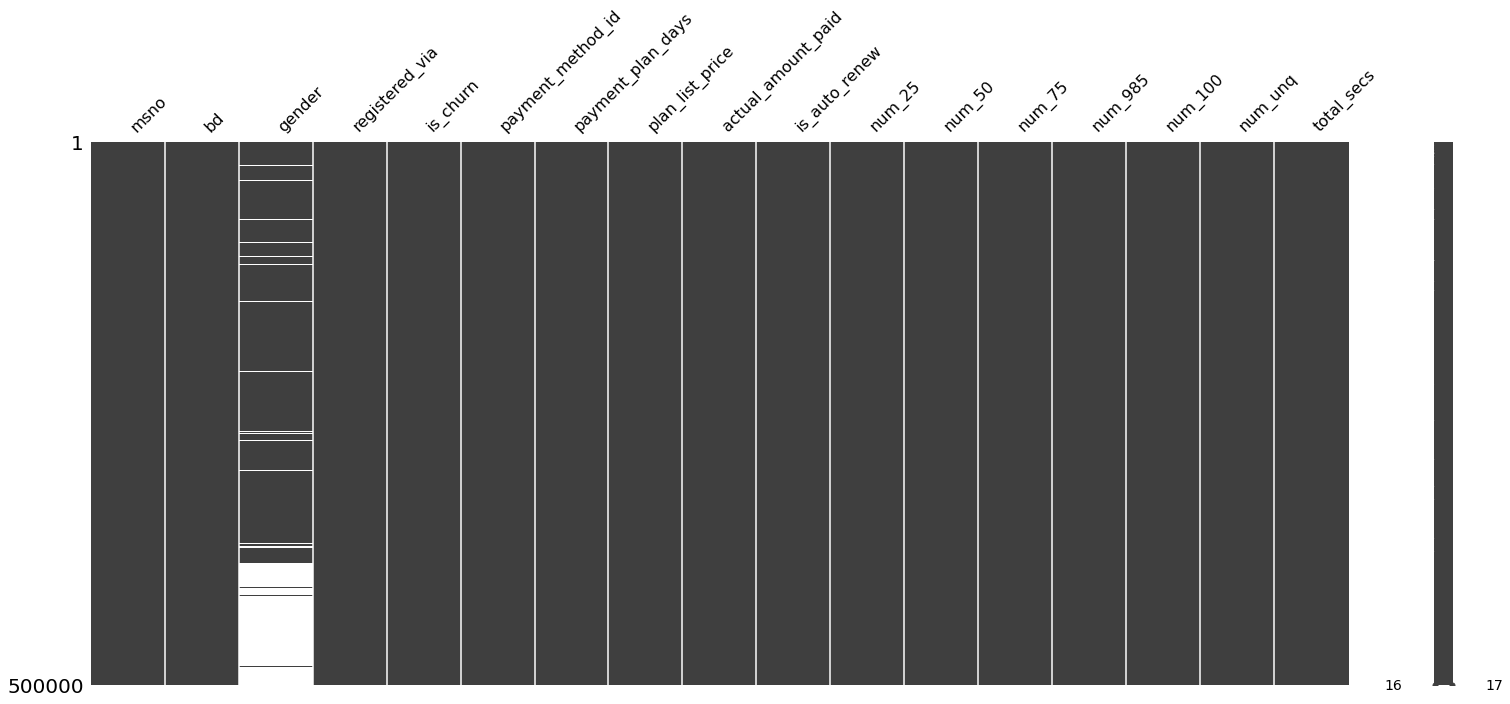

In [128]:
msno.matrix(df_merged_with_age)

In [129]:
df_merged_with_age.to_csv('kkbox_master.csv', index=False)

# Upload to Github

In [5]:
df_kkbox = pd.read_csv('https://raw.githubusercontent.com/iamharshit/tmp/main/kkbox_master.csv')

In [6]:
df_kkbox

,msno,bd,gender,registered_via,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,yLkV2gbZ4GLFwqTOXLVHz0VGrMYcgBGgKZ3kj9RiYu8=,30,male,9,0,39,30,149,149,1,63,14,10,33,140,220,47839.952
1,WH5Jq4mgtfUFXh2yz+HrcTXKS4Oess4k4W3qKolAeb0=,34,male,9,1,32,180,536,536,0,125,71,45,36,1545,1020,410099.424
2,I0yFvqMoNkM8ZNHb617e1RBzIS/YRKemHO7Wj13EtA0=,63,male,9,0,40,30,149,149,1,1096,359,233,282,4734,5447,1355507.929
3,4De1jAxNRABoyRBDZ82U0yEmzYkqeOugRGVNIf92Xb8=,28,female,9,0,36,30,180,180,1,69,19,10,14,321,275,84676.339
4,Z6WIOK9vXy+e2XDBiioNAxuZ0ScXSU/Ebq4tUwqVSrE=,38,female,9,0,40,30,149,149,1,701,526,244,216,1096,2558,410513.232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,rqi+w7JVQV1fqmo5y8z6FfSKOLc+NRyFIHcEonqwQG0=,0,NaN,7,0,41,30,149,149,1,544,70,44,38,1175,1319,319806.914
499996,LSHHqjquHtmfgiNOs5nyu+7LQsy29CylgjUmoQrBXh8=,0,female,9,0,40,30,149,149,1,838,239,92,100,1725,2209,500696.771
499997,m+DlDfXfc57sPTmlGoTWmSs0txANdlt57pgaz2SLL/w=,0,NaN,7,0,41,30,99,99,1,418,81,75,124,2614,1740,756817.019
499998,N4szCcTlAXxicMGF0kDIvO1qxKa6ftl9eJyabEBvE0s=,0,NaN,7,0,41,30,99,99,1,33,11,1,3,78,102,23308.854


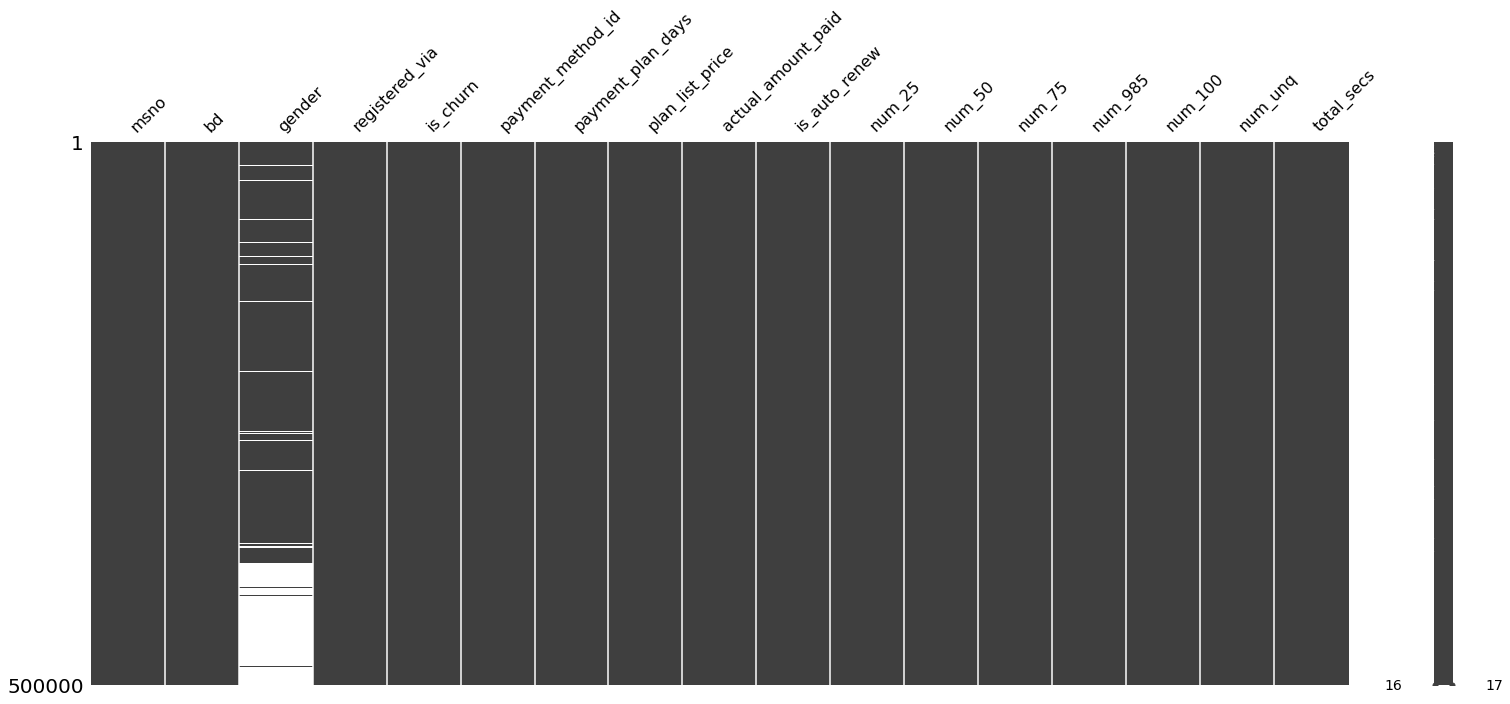

In [8]:
msno.matrix(df_kkbox)